<a href="https://colab.research.google.com/github/Gustavo-Pinho/Forest-Fires-Data/blob/main/ForestFiresData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise Exploratória

In [ ]:
pip install ucimlrepo

In [ ]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import pymc as pm
import arviz as az
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
def quantile_loss(y_true, y_pred, q=0.5):
    return np.mean(np.maximum(q * (y_true - y_pred), (q - 1) * (y_true - y_pred)))

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [ ]:
# ---
# ## 1. Análise Exploratória de Dados (EDA)
# ---

# Carregar dataset
forest_fires = fetch_ucirepo(id=162)
df_all = forest_fires.data.original


# Metadados e variáveis
print("Metadados:")
print(forest_fires.metadata)
print("\nInformações das Variáveis:")
print(forest_fires.variables)

Metadados:
{'uci_id': 162, 'name': 'Forest Fires', 'repository_url': 'https://archive.ics.uci.edu/dataset/162/forest+fires', 'data_url': 'https://archive.ics.uci.edu/static/public/162/data.csv', 'abstract': 'This is a difficult regression task, where the aim is to predict the burned area of forest fires, in the northeast region of Portugal, by using meteorological and other data (see details at: http://www.dsi.uminho.pt/~pcortez/forestfires).', 'area': 'Climate and Environment', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 517, 'num_features': 12, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['area'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2007, 'last_updated': 'Thu Jan 11 2024', 'dataset_doi': '10.24432/C5D88D', 'creators': ['Paulo Cortez', 'Anbal Morais'], 'intro_paper': {'ID': 368, 'type': 'NATIVE', 'title': 'A data mining approach to predict forest fires using meteor

In [ ]:
display(df_all)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [ ]:
df_all[["X","Y","FFMC","DMC",	"DC",	"ISI",	"temp"	,"RH",	"wind",	"rain",	"area"]].describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


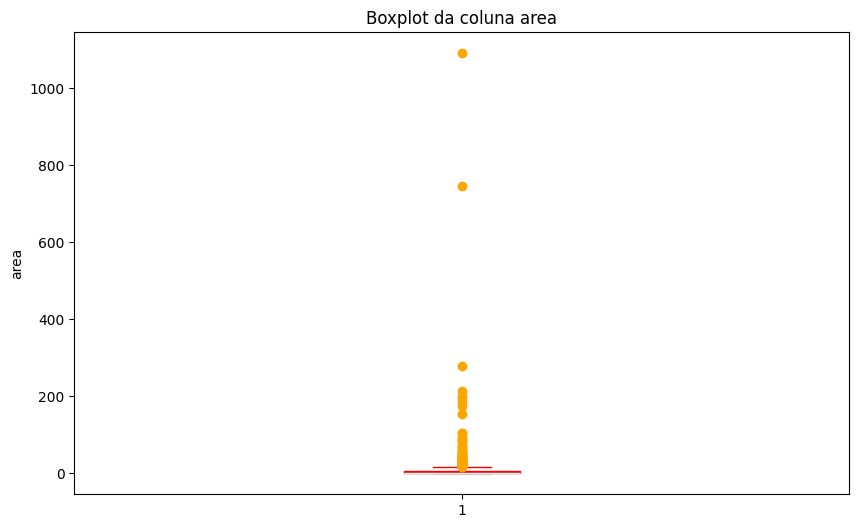

In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot(
    df_all['area'],
    patch_artist=True,
    boxprops=dict(color='red', facecolor='red'),
    whiskerprops=dict(color='red'),
    capprops=dict(color='red'),
    medianprops=dict(color='white'),
    flierprops=dict(
        marker='o',
        markerfacecolor='orange',
        markeredgecolor='orange'
    )
)
plt.title('Boxplot da coluna area')
plt.ylabel('area')
plt.show()

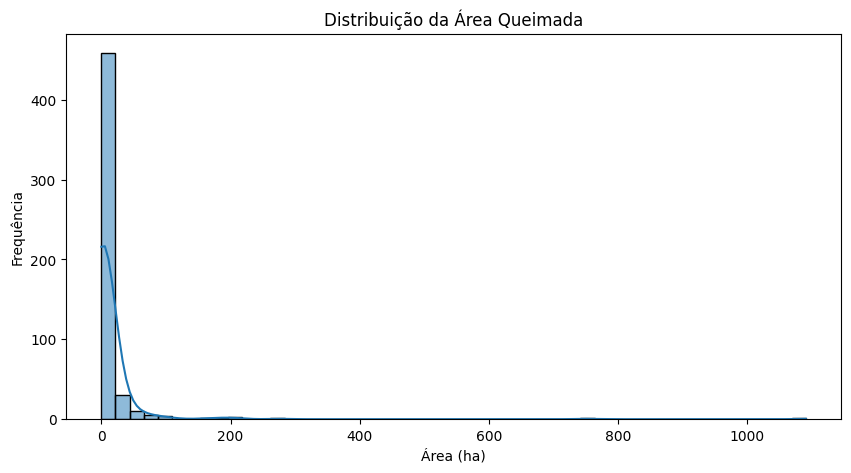

In [ ]:
# Histograma da área queimada
plt.figure(figsize=(10, 5))
sns.histplot(df_all['area'], bins=50, kde=True)
plt.title('Distribuição da Área Queimada')
plt.xlabel('Área (ha)')
plt.ylabel('Frequência')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)


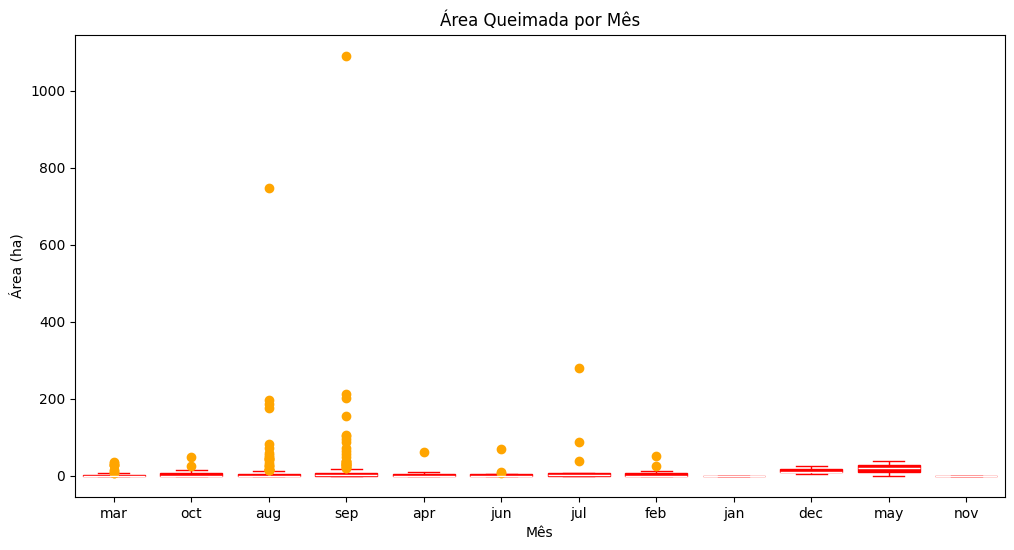

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    x='month',
    y='area',
    data=df_all,
    patch_artist=True,
    boxprops=dict(color='red', facecolor='red'),
    whiskerprops=dict(color='red'),
    capprops=dict(color='red'),
    medianprops=dict(color='white'),
    flierprops=dict(
        marker='o',
        markerfacecolor='orange',
        markeredgecolor='orange'
))
plt.title('Área Queimada por Mês')
plt.xlabel('Mês')
plt.ylabel('Área (ha)')
plt.show()

In [ ]:
X = df_all.drop('area', axis=1)
y = df_all['area'].values

In [ ]:
from sklearn.preprocessing import LabelEncoder

le_month = LabelEncoder()
X["month_num"] = le_month.fit_transform(X["month"])

le_day = LabelEncoder()
X["day_num"]   = le_day.fit_transform(X["day"])

X["month"] = le_month.fit_transform(X["month"])
X["day"]   = le_day.fit_transform(X["day"])

X = X.drop(["month_num", "day_num"], axis=1)

display(X)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,7,5,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,7,4,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,7,4,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,8,6,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,8,6,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0
513,2,4,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0
514,7,4,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0
515,1,4,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0


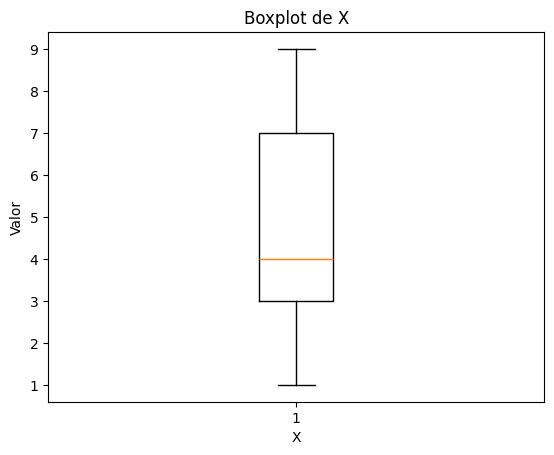

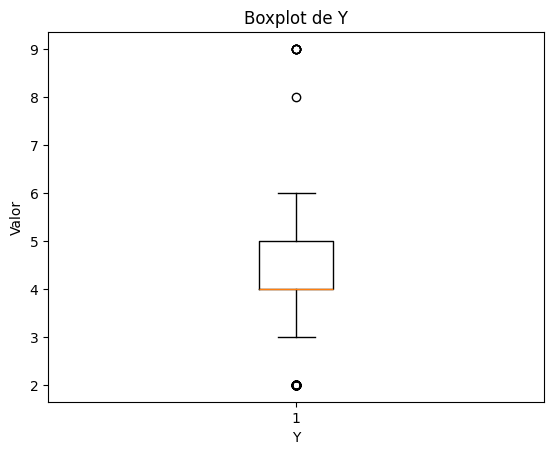

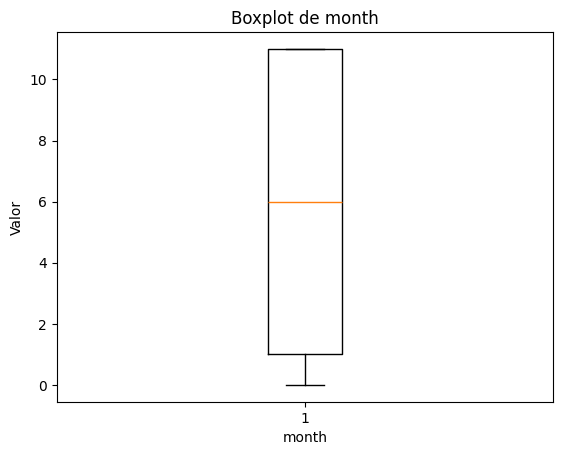

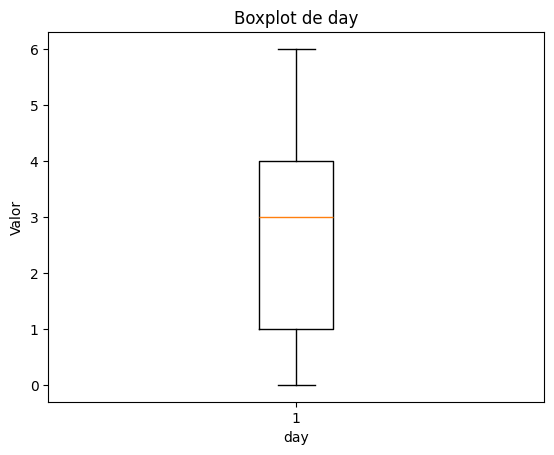

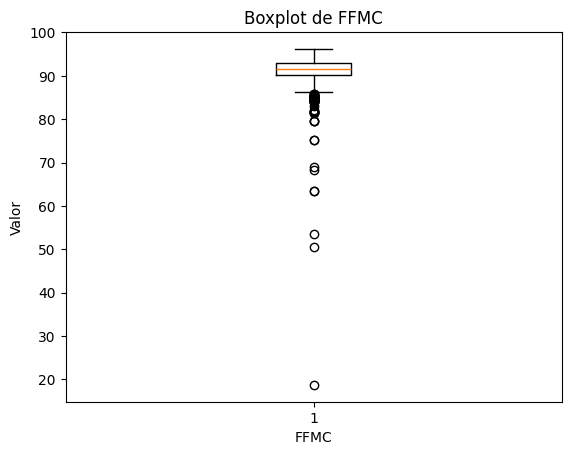

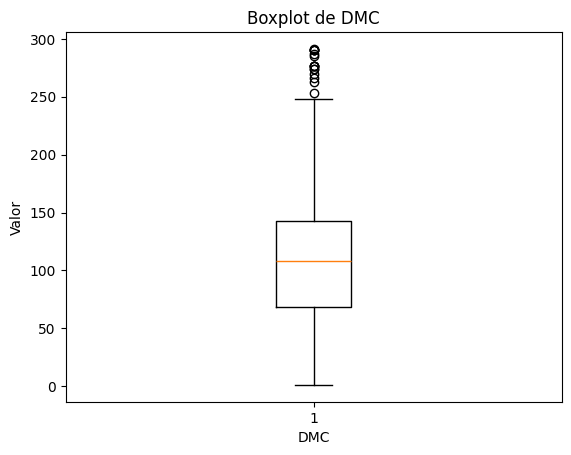

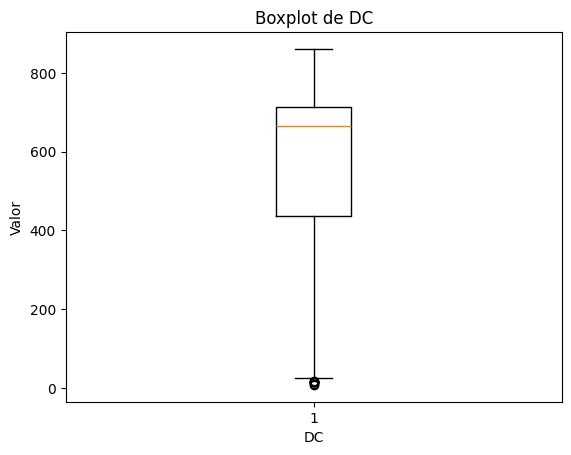

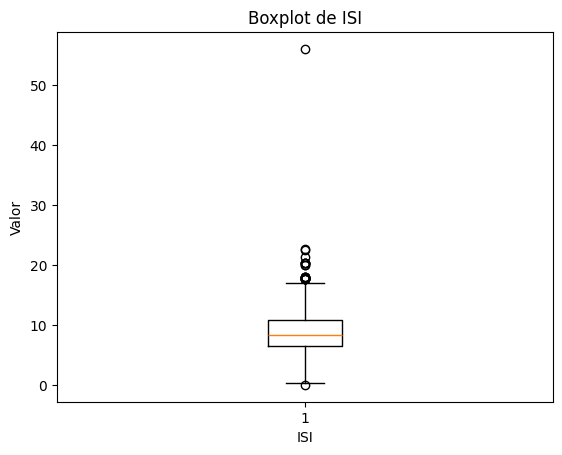

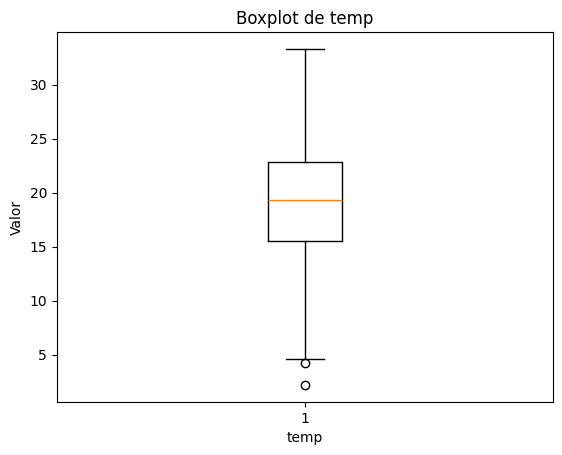

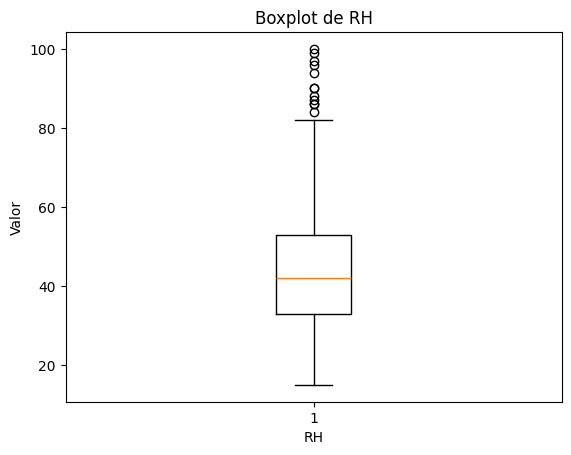

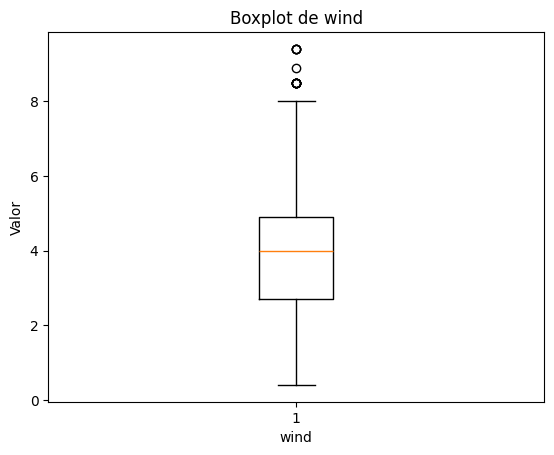

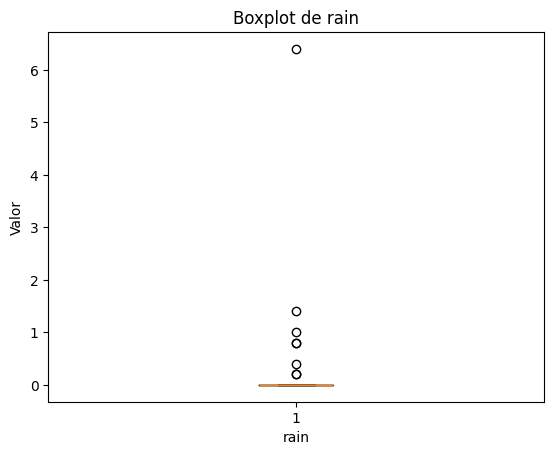

In [ ]:
cols = ['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']

# Gerar um boxplot por variável
for col in cols:
    plt.figure()
    plt.boxplot(X[col].dropna(), vert=True)
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)
    plt.ylabel('Valor')
    plt.show()

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X[['X', 'Y','month','day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']] = scaler.fit_transform(X[['X', 'Y','month','day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']])
display(X)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,0.75,1.0,0.1,-1.000000,-2.000000,-1.112466,-2.063360,-0.767442,-1.520548,0.45,1.227273,0.0
1,0.75,0.0,0.4,0.666667,-0.370370,-0.987805,0.017741,-0.395349,-0.178082,-0.45,-1.409091,0.0
2,0.75,0.0,0.4,-0.333333,-0.370370,-0.875339,0.082187,-0.395349,-0.643836,-0.45,-1.227273,0.0
3,1.00,2.0,0.1,-1.000000,0.037037,-1.016260,-2.124185,0.139535,-1.506849,2.75,0.000000,0.2
4,1.00,2.0,0.1,0.000000,-0.851852,-0.772358,-2.034757,0.279070,-1.082192,2.85,-1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
512,0.00,-1.0,-0.5,0.000000,-3.703704,-0.699187,0.005069,-1.511628,1.164384,-0.50,-0.590909,0.0
513,-0.50,0.0,-0.5,0.000000,-3.703704,-0.699187,0.005069,-1.511628,0.356164,1.45,0.818182,0.0
514,0.75,0.0,-0.5,0.000000,-3.703704,-0.699187,0.005069,-1.511628,0.260274,1.40,1.227273,0.0
515,-0.75,0.0,-0.5,-0.333333,1.037037,0.510840,-0.179218,0.674419,0.863014,0.00,0.000000,0.0


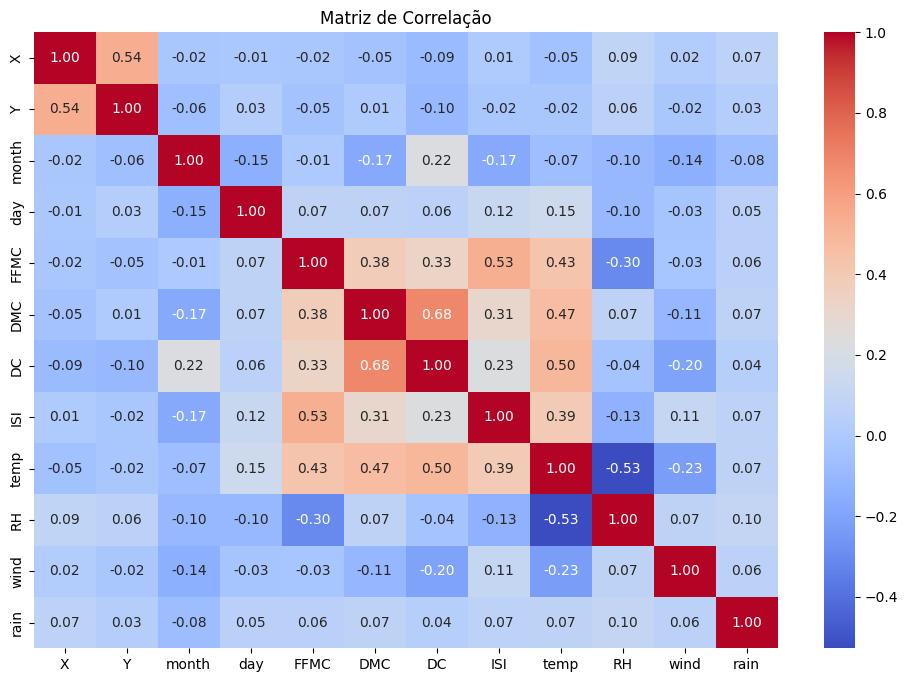

In [ ]:
# Matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

x_f_const = sm.add_constant(X)

vif_data = pd.DataFrame({
    'Variável': x_f_const.columns,
    'VIF': [variance_inflation_factor(x_f_const.values, i) for i in range(x_f_const.shape[1])]
})

display(vif_data)

,Variável,VIF
0,const,1.773347
1,X,1.434815
2,Y,1.448213
3,month,1.468514
4,day,1.059148
5,FFMC,1.711713
6,DMC,2.715938
7,DC,2.769188
8,ISI,1.609213
9,temp,2.766729


In [ ]:
p = X.shape[1]
p

12

In [ ]:
# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Regressão Quantílica Bayesiana com Laplace Assimétrica

In [ ]:
# ### 3.1 Regressão Quantílica Bayesiana com Laplace Assimétrica
with pm.Model() as model_quantile:
    # Priors
    beta0_quantile = pm.Normal('beta0', mu=0, sigma=1)
    beta_quantile = pm.Normal('beta', mu=0, sigma=1, shape=p)
    b_quantile = pm.HalfNormal('b', sigma=1)

    # Preditor linear
    mu_quantile = beta0_quantile + pm.math.dot(X_train, beta_quantile)

    # Likelihood
    y_obs_quantile = pm.AsymmetricLaplace('y_obs', mu=mu_quantile, b=b_quantile, q=0.52, observed=y_train)

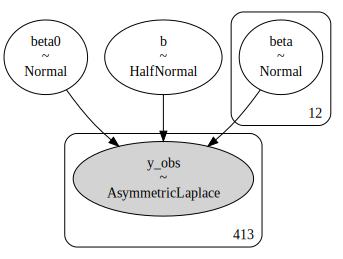

In [ ]:
pm.model_to_graphviz(model_quantile)

# Análise a Priori

In [ ]:
with model_quantile:
  trace_priori_model_quantile = pm.sample_prior_predictive()

array([<Axes: xlabel='y_obs'>], dtype=object)

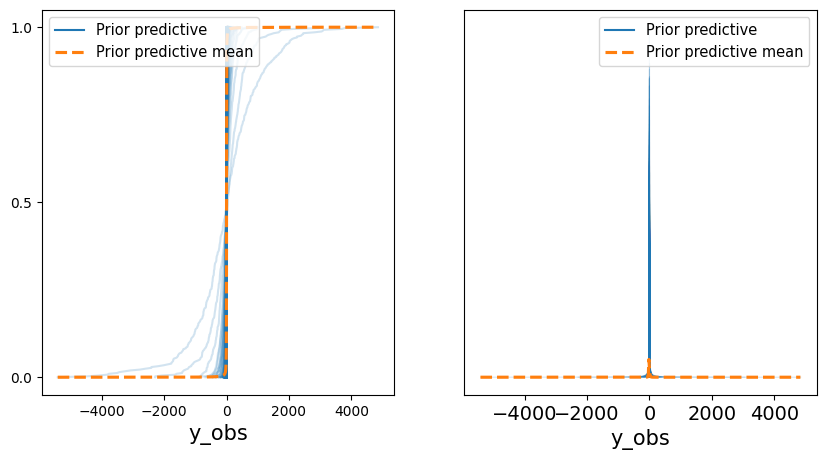

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
az.plot_ppc(trace_priori_model_quantile, group='prior', kind='cumulative',ax=axes[0])
az.plot_ppc(trace_priori_model_quantile, group='prior',ax=axes[1])

In [ ]:
with model_quantile:
    trace_quantile = pm.sample()
pm.summary(trace_quantile)

Output()

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
b,0.086,0.004,0.078,0.095,0.000,0.000,1884.0,1510.0,1.00
beta[0],0.137,0.574,-0.932,1.193,0.014,0.012,1606.0,1099.0,1.00
beta[1],0.168,0.274,-0.355,0.665,0.007,0.006,1765.0,1320.0,1.00
beta[2],0.311,0.646,-0.911,1.552,0.016,0.014,1628.0,1388.0,1.01
beta[3],-0.011,0.442,-0.872,0.771,0.011,0.010,1744.0,1444.0,1.00
beta[4],0.007,0.209,-0.364,0.426,0.006,0.006,1478.0,1104.0,1.00
beta[5],0.406,0.519,-0.545,1.374,0.013,0.012,1652.0,1599.0,1.00
beta[6],-0.024,0.463,-0.882,0.902,0.013,0.011,1277.0,1313.0,1.00
beta[7],-0.176,0.428,-0.932,0.653,0.010,0.010,1701.0,1152.0,1.00
beta[8],-0.065,0.544,-1.013,1.018,0.013,0.012,1743.0,1336.0,1.00


<Figure size 1200x800 with 0 Axes>

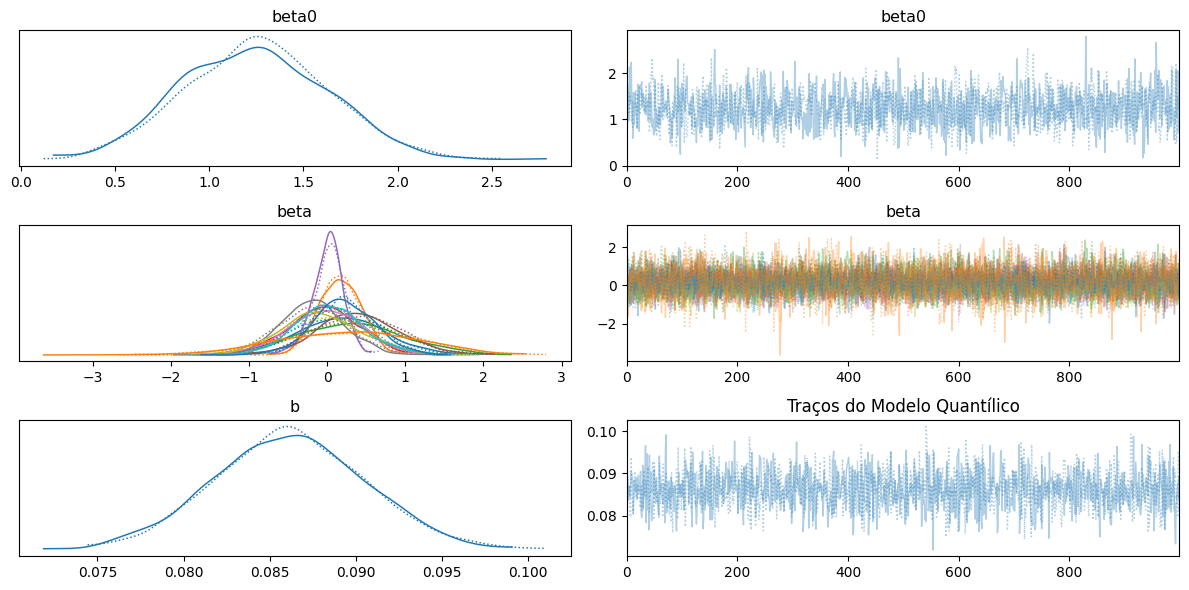

In [ ]:
# Diagnósticos
plt.figure(figsize=(12, 8))
az.plot_trace(trace_quantile, var_names=['beta0', 'beta', 'b'])
plt.tight_layout()
plt.title('Traços do Modelo Quantílico')
plt.show()

# Análise a Posteriori

In [ ]:
with model_quantile:
  trace_post_model_quantile = pm.sample_posterior_predictive(trace_quantile)

Output()

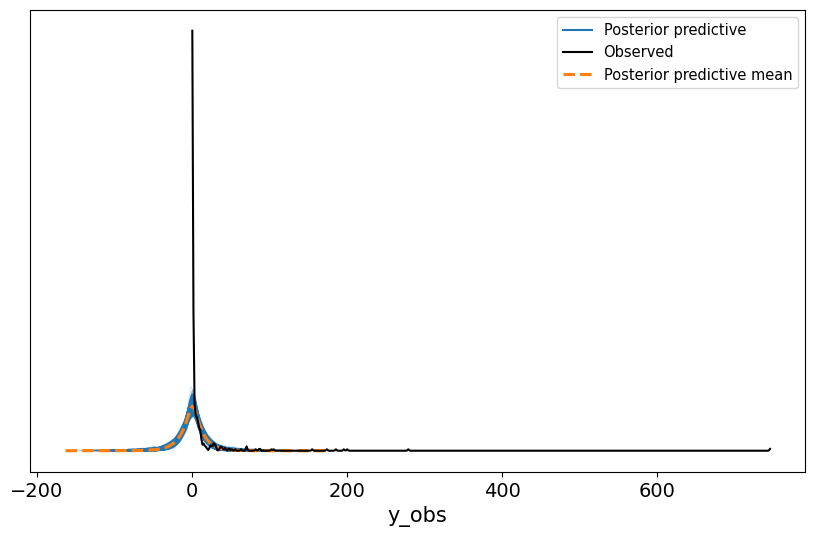

In [ ]:
az.plot_ppc(trace_post_model_quantile, mean=True, figsize=(10, 6), textsize=14)

plt.show()

In [ ]:
# Salvar traço
az.to_netcdf(trace_quantile, 'trace_quantile.nc')

'trace_quantile.nc'

#Regressão Linear Bayesiana com SkewNormal

In [ ]:
# ### 3.2 Regressão Linear Bayesiana com SkewNormal
with pm.Model() as model_skewnormal:
    # Priors
    beta0_skew = pm.Normal('beta0', mu=0, sigma=1)
    beta_skew = pm.Normal('beta', mu=0, sigma=1, shape=p)
    sigma_skew = pm.HalfNormal('sigma', sigma=1)
    alpha_skew = pm.Normal('alpha', mu=0, sigma=1)

    # Preditor linear
    mu_skew = beta0_skew + pm.math.dot(X_train, beta_skew)

    # Likelihood
    y_obs_skew = pm.SkewNormal('y_obs', mu=mu_skew, sigma=sigma_skew, alpha=alpha_skew, observed=y_train)

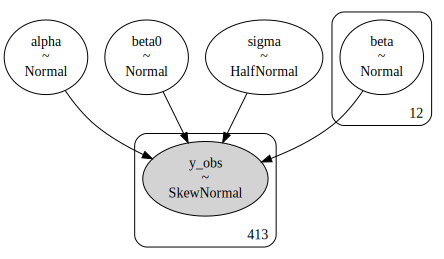

In [ ]:
pm.model_to_graphviz(model_skewnormal)

#Análise a Priori

In [ ]:
with model_skewnormal:
  trace_priori_model_skewnormal = pm.sample_prior_predictive()

array([<Axes: xlabel='y_obs'>], dtype=object)

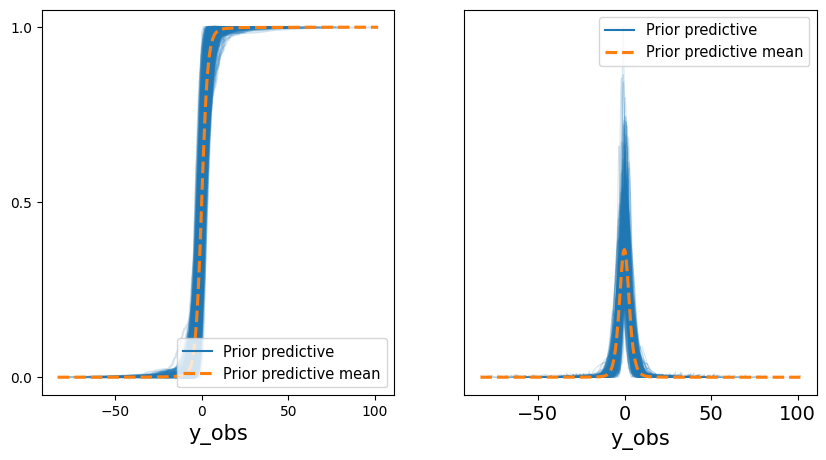

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
az.plot_ppc(trace_priori_model_skewnormal, group='prior', kind='cumulative',ax=axes[0])
az.plot_ppc(trace_priori_model_skewnormal, group='prior',ax=axes[1])

In [ ]:
with model_skewnormal:
  trace_skewnormal = pm.sample()
pm.summary(trace_skewnormal)

Output()

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,7.628,0.574,6.588,8.690,0.009,0.013,3894.0,1584.0,1.0
beta[0],0.305,0.645,-0.928,1.450,0.011,0.014,3723.0,1819.0,1.0
beta[1],0.101,0.354,-0.616,0.730,0.006,0.008,3499.0,1711.0,1.0
beta[2],-0.107,0.691,-1.328,1.285,0.013,0.015,2919.0,1540.0,1.0
beta[3],0.238,0.556,-0.725,1.344,0.009,0.013,3639.0,1637.0,1.0
beta[4],0.290,0.310,-0.237,0.885,0.007,0.006,2329.0,1406.0,1.0
beta[5],0.253,0.572,-0.808,1.313,0.011,0.012,2908.0,1343.0,1.0
beta[6],0.585,0.565,-0.448,1.627,0.011,0.011,2705.0,1484.0,1.0
beta[7],-0.564,0.533,-1.552,0.440,0.010,0.012,2721.0,1503.0,1.0
beta[8],0.107,0.648,-1.131,1.287,0.014,0.013,2257.0,1627.0,1.0


<Figure size 1200x800 with 0 Axes>

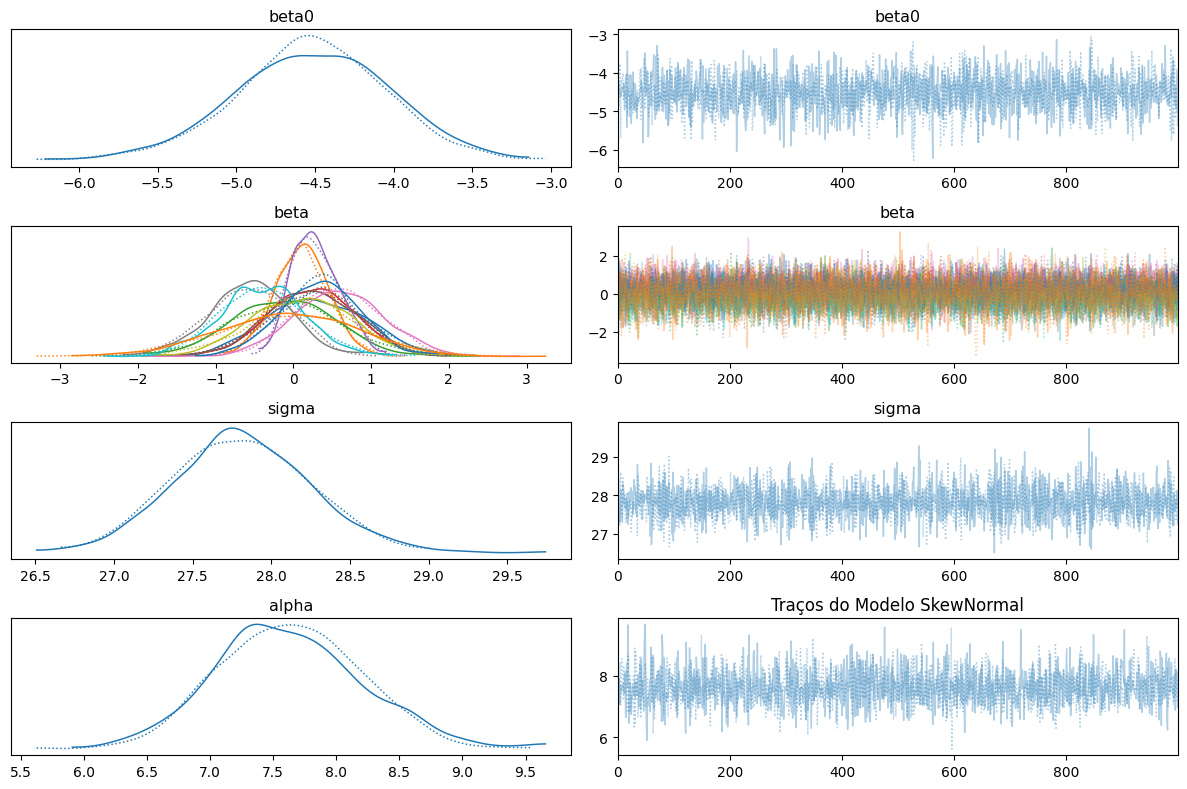

In [ ]:
# Diagnósticos
plt.figure(figsize=(12, 8))
az.plot_trace(trace_skewnormal, var_names=['beta0', 'beta', 'sigma', 'alpha'])
plt.tight_layout()
plt.title('Traços do Modelo SkewNormal')
plt.show()

#Análise a Posteriori

In [ ]:
with model_skewnormal:
  trace_post_model_skewnormal = pm.sample_posterior_predictive(trace_skewnormal)

Output()

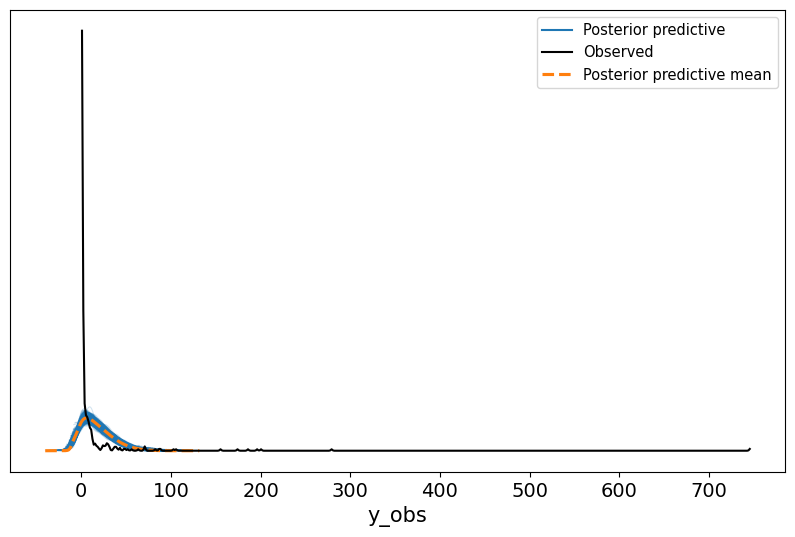

In [ ]:
az.plot_ppc(trace_post_model_skewnormal, mean=True, figsize=(10, 6), textsize=14)

plt.show()

In [ ]:
# Salvar traço
az.to_netcdf(trace_skewnormal, 'trace_skewnormal.nc')

'trace_skewnormal.nc'

#Processo Gaussiano

In [ ]:
x_train_gp = X_train.values

In [ ]:
with pm.Model() as model_gp_latent:
    l_rq      = pm.HalfNormal('l_rq', sigma=1)
    alpha_rq  = pm.HalfNormal('alpha_rq', sigma=1)
    sigma_rq  = pm.HalfNormal('sigma_rq', sigma=1)

    l_m32     = pm.HalfNormal('l_m32', sigma=1)
    sigma_m32 = pm.HalfNormal('sigma_m32', sigma=1)

    cov_rq   = sigma_rq   * pm.gp.cov.RatQuad(input_dim=p, ls=l_rq, alpha=alpha_rq)
    cov_m32  = sigma_m32  * pm.gp.cov.Matern32(input_dim=p, ls=l_m32)

    cov_total = cov_rq + cov_m32

    a    = pm.Normal('a',    mu=0, sigma=1)
    beta = pm.Normal('beta', mu=0, sigma=1, shape=p)

    M = pm.gp.mean.Linear(coeffs=beta, intercept=a)


    gp_latent = pm.gp.Latent(mean_func=M, cov_func=cov_total)

    f = gp_latent.prior('f', X=x_train_gp)

    sigma_noise = pm.HalfNormal('sigma_noise', sigma=1)

    y_obs = pm.Normal('y_obs', mu=f, sigma=sigma_noise, observed=y_train)

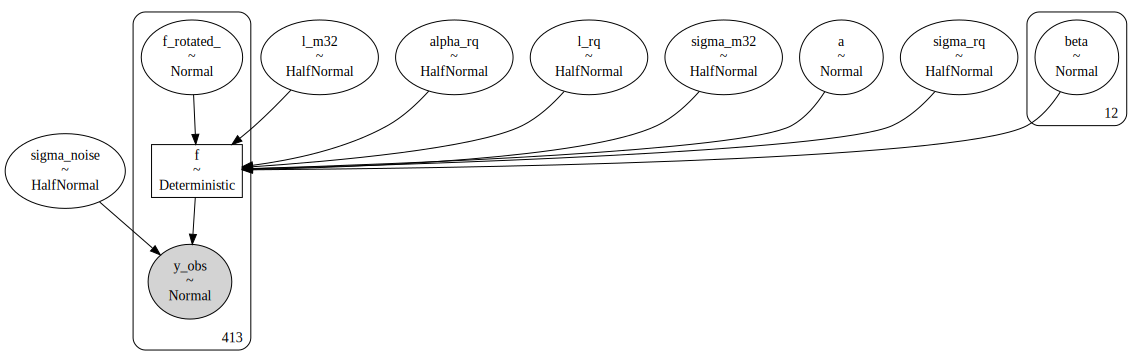

In [ ]:
pm.model_to_graphviz(model_gp_latent)

#Análise a Priori

In [ ]:
with model_gp_latent:
  trace_priori_model_gp = pm.sample_prior_predictive()

array([<Axes: xlabel='y_obs'>], dtype=object)

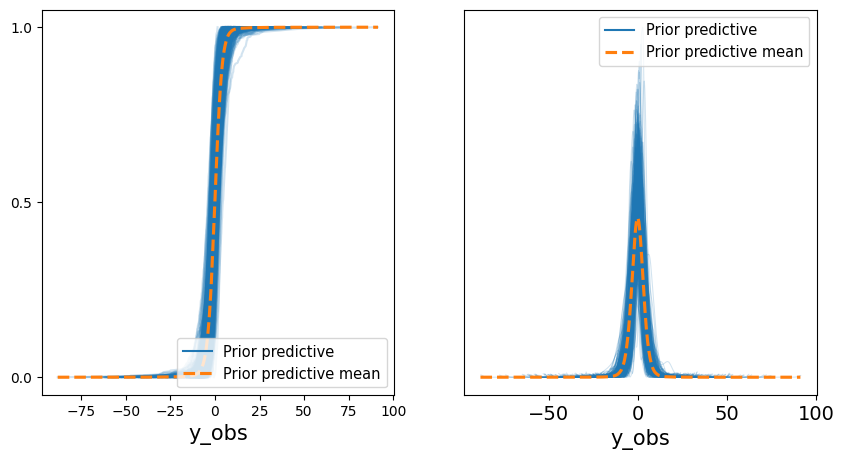

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
az.plot_ppc(trace_priori_model_gp, group='prior', kind='cumulative',ax=axes[0])
az.plot_ppc(trace_priori_model_gp, group='prior',ax=axes[1])

In [ ]:
with model_gp_latent:
  approx_gp = pm.fit(10000)

Output()

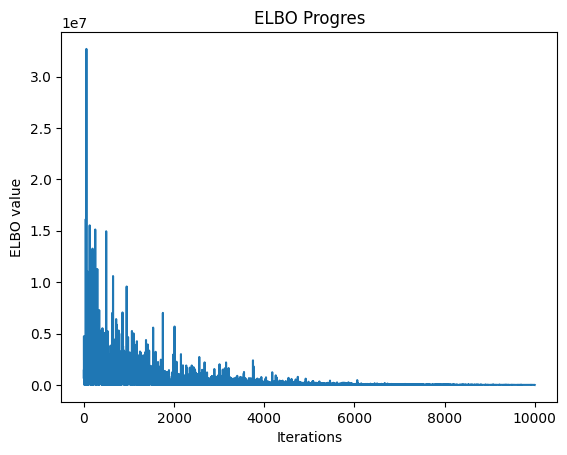

In [ ]:
plt.plot(approx_gp.hist)
plt.title('ELBO Progres')
plt.xlabel('Iterations')
plt.ylabel('ELBO value')
plt.show()

In [ ]:
with model_gp_latent:
  trace_gp = approx_gp.sample(10000)
pm.summary(trace_gp)

Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a,1.588,0.579,0.508,2.674,0.006,0.004,9692.0,8859.0,NaN
alpha_rq,0.636,0.273,0.200,1.114,0.003,0.004,9993.0,8724.0,NaN
beta[0],2.221,0.638,1.011,3.407,0.006,0.005,9810.0,9758.0,NaN
beta[1],1.674,0.444,0.821,2.495,0.004,0.003,10060.0,10054.0,NaN
beta[2],-1.079,0.641,-2.304,0.087,0.006,0.005,9951.0,9757.0,NaN
...,...,...,...,...,...,...,...,...,...
l_m32,1.280,0.361,0.660,1.940,0.004,0.003,9918.0,10085.0,NaN
l_rq,1.130,0.357,0.528,1.795,0.004,0.003,9917.0,9633.0,NaN
sigma_m32,7.139,5.043,1.040,15.781,0.050,0.090,10340.0,9434.0,NaN
sigma_noise,11.903,3.224,6.396,18.076,0.032,0.029,10106.0,9921.0,NaN


<Figure size 1200x800 with 0 Axes>

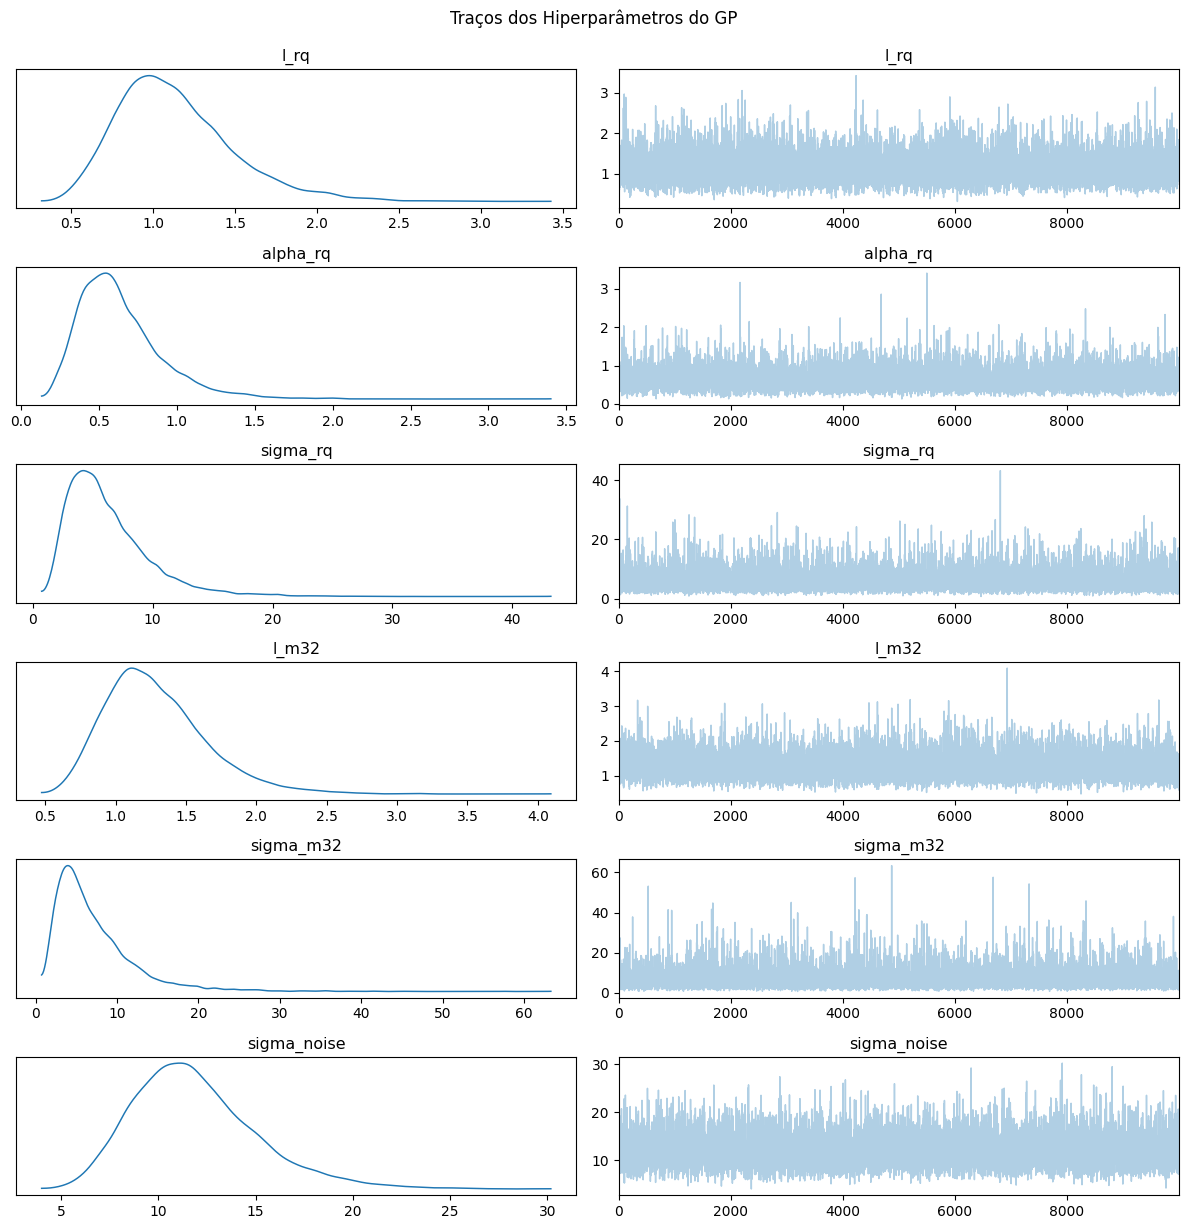

In [ ]:
# Diagnósticos
plt.figure(figsize=(12, 8))
az.plot_trace(
    trace_gp,
    var_names=[
        'l_rq',
        'alpha_rq',
        'sigma_rq',
        'l_m32',
        'sigma_m32',
        'sigma_noise'
    ]
)
plt.tight_layout()
plt.suptitle('Traços dos Hiperparâmetros do GP', y=1.02)
plt.show()

#Análise a Posteriori

In [ ]:
with model_gp_latent:
  trace_post_model_gp = pm.sample_posterior_predictive(trace_gp)

Output()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


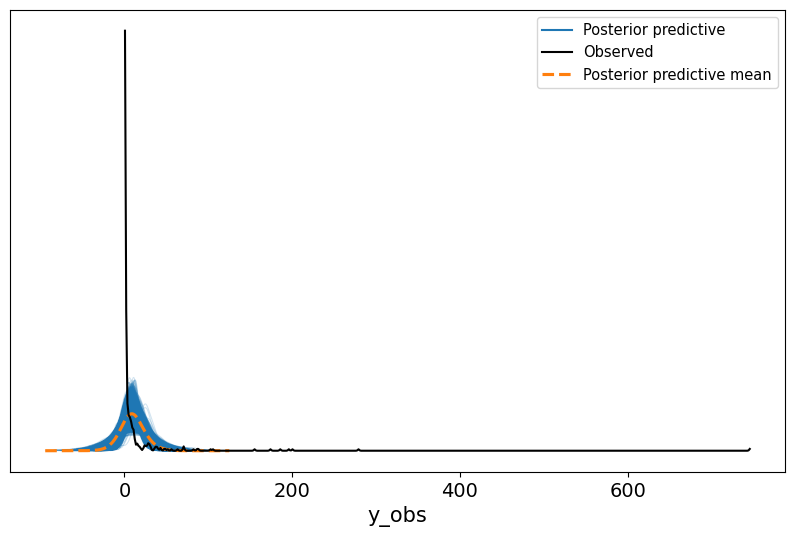

In [ ]:
az.plot_ppc(trace_post_model_gp, mean=True, figsize=(10, 6), textsize=14)

plt.show()

In [ ]:
# Salvar traço
az.to_netcdf(trace_gp, 'trace_gp.nc')

'trace_gp.nc'

In [ ]:
with pm.Model() as model_gp_latent_robust:
    l_rq      = pm.HalfNormal('l_rq', sigma=1)
    alpha_rq  = pm.HalfNormal('alpha_rq', sigma=1)
    sigma_rq  = pm.HalfNormal('sigma_rq', sigma=1)

    l_m32     = pm.HalfNormal('l_m32', sigma=1)
    sigma_m32 = pm.HalfNormal('sigma_m32', sigma=1)

    cov_rq   = sigma_rq   * pm.gp.cov.RatQuad(input_dim=p, ls=l_rq, alpha=alpha_rq)
    cov_m32  = sigma_m32  * pm.gp.cov.Matern32(input_dim=p, ls=l_m32)

    cov_total = cov_rq + cov_m32

    a    = pm.Normal('a',    mu=0, sigma=1)
    beta = pm.Normal('beta', mu=0, sigma=1, shape=p)

    M = pm.gp.mean.Linear(coeffs=beta, intercept=a)


    gp_latent = pm.gp.Latent(mean_func=M, cov_func=cov_total)

    f = gp_latent.prior('f', X=x_train_gp)

    sigma_noise = pm.HalfNormal('sigma_noise', sigma=1)

    df = pm.Exponential('df', lam=1)
    y_obs = pm.StudentT('y_obs', nu=df, mu=f,
                   sigma=sigma_noise,
                   observed=y_train)

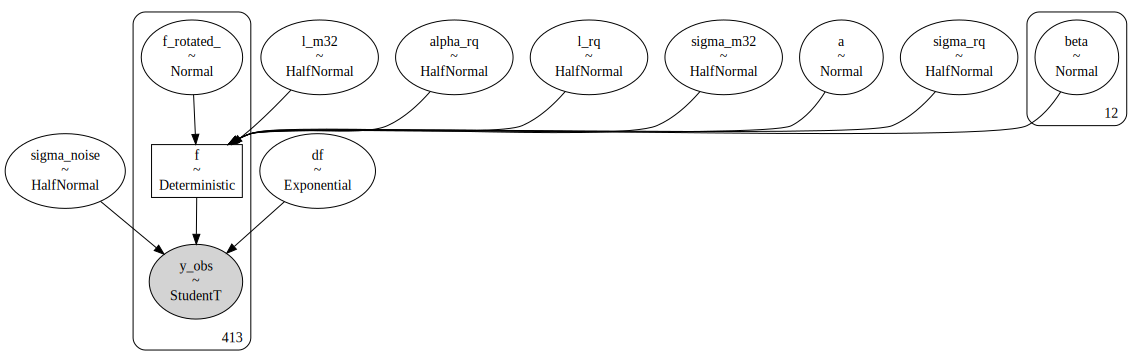

In [ ]:
pm.model_to_graphviz(model_gp_latent_robust)

#Análise a Priori

In [ ]:
with model_gp_latent_robust:
  trace_priori_model_gp_robust = pm.sample_prior_predictive()

array([<Axes: xlabel='y_obs'>], dtype=object)

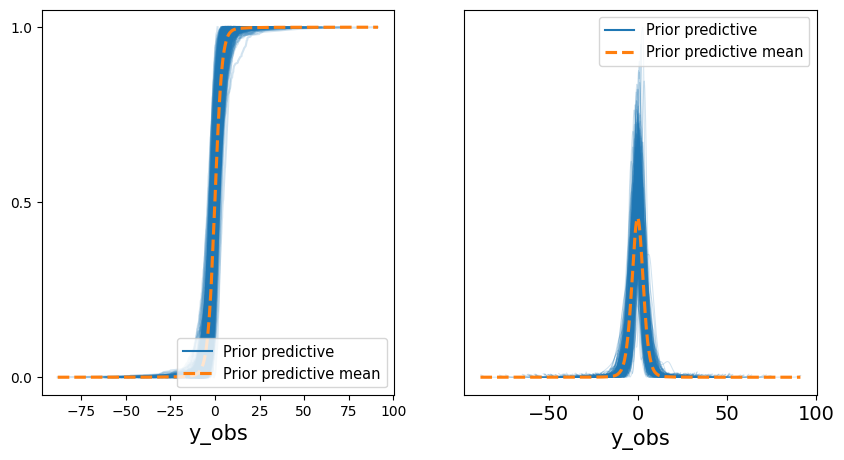

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
az.plot_ppc(trace_priori_model_gp, group='prior', kind='cumulative',ax=axes[0])
az.plot_ppc(trace_priori_model_gp, group='prior',ax=axes[1])

In [ ]:
with model_gp_latent_robust:
  approx_gp_robust = pm.fit(10000)

Output()

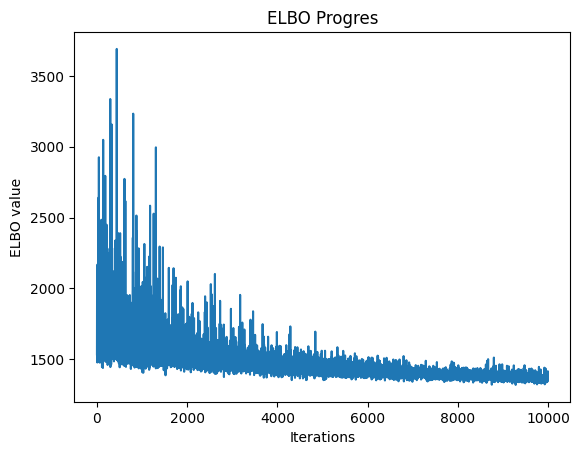

In [ ]:
plt.plot(approx_gp_robust.hist)
plt.title('ELBO Progres')
plt.xlabel('Iterations')
plt.ylabel('ELBO value')
plt.show()

In [ ]:
with model_gp_latent_robust:
  trace_gp_robust = approx_gp_robust.sample(10000)
pm.summary(trace_gp_robust)

Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a,0.409,0.202,0.025,0.786,0.002,0.001,9856.0,9978.0,NaN
alpha_rq,0.783,0.844,0.029,2.046,0.008,0.036,9979.0,9900.0,NaN
beta[0],0.050,0.260,-0.421,0.549,0.003,0.002,9709.0,9707.0,NaN
beta[1],0.065,0.149,-0.221,0.342,0.002,0.001,9751.0,9616.0,NaN
beta[2],0.093,0.282,-0.454,0.604,0.003,0.002,9468.0,9824.0,NaN
...,...,...,...,...,...,...,...,...,...
l_m32,1.082,0.882,0.103,2.629,0.009,0.016,10343.0,10089.0,NaN
l_rq,1.122,0.832,0.168,2.554,0.008,0.019,10016.0,9294.0,NaN
sigma_m32,0.114,0.065,0.025,0.230,0.001,0.001,9572.0,9426.0,NaN
sigma_noise,1.175,0.201,0.806,1.550,0.002,0.002,9908.0,9644.0,NaN


<Figure size 1200x800 with 0 Axes>

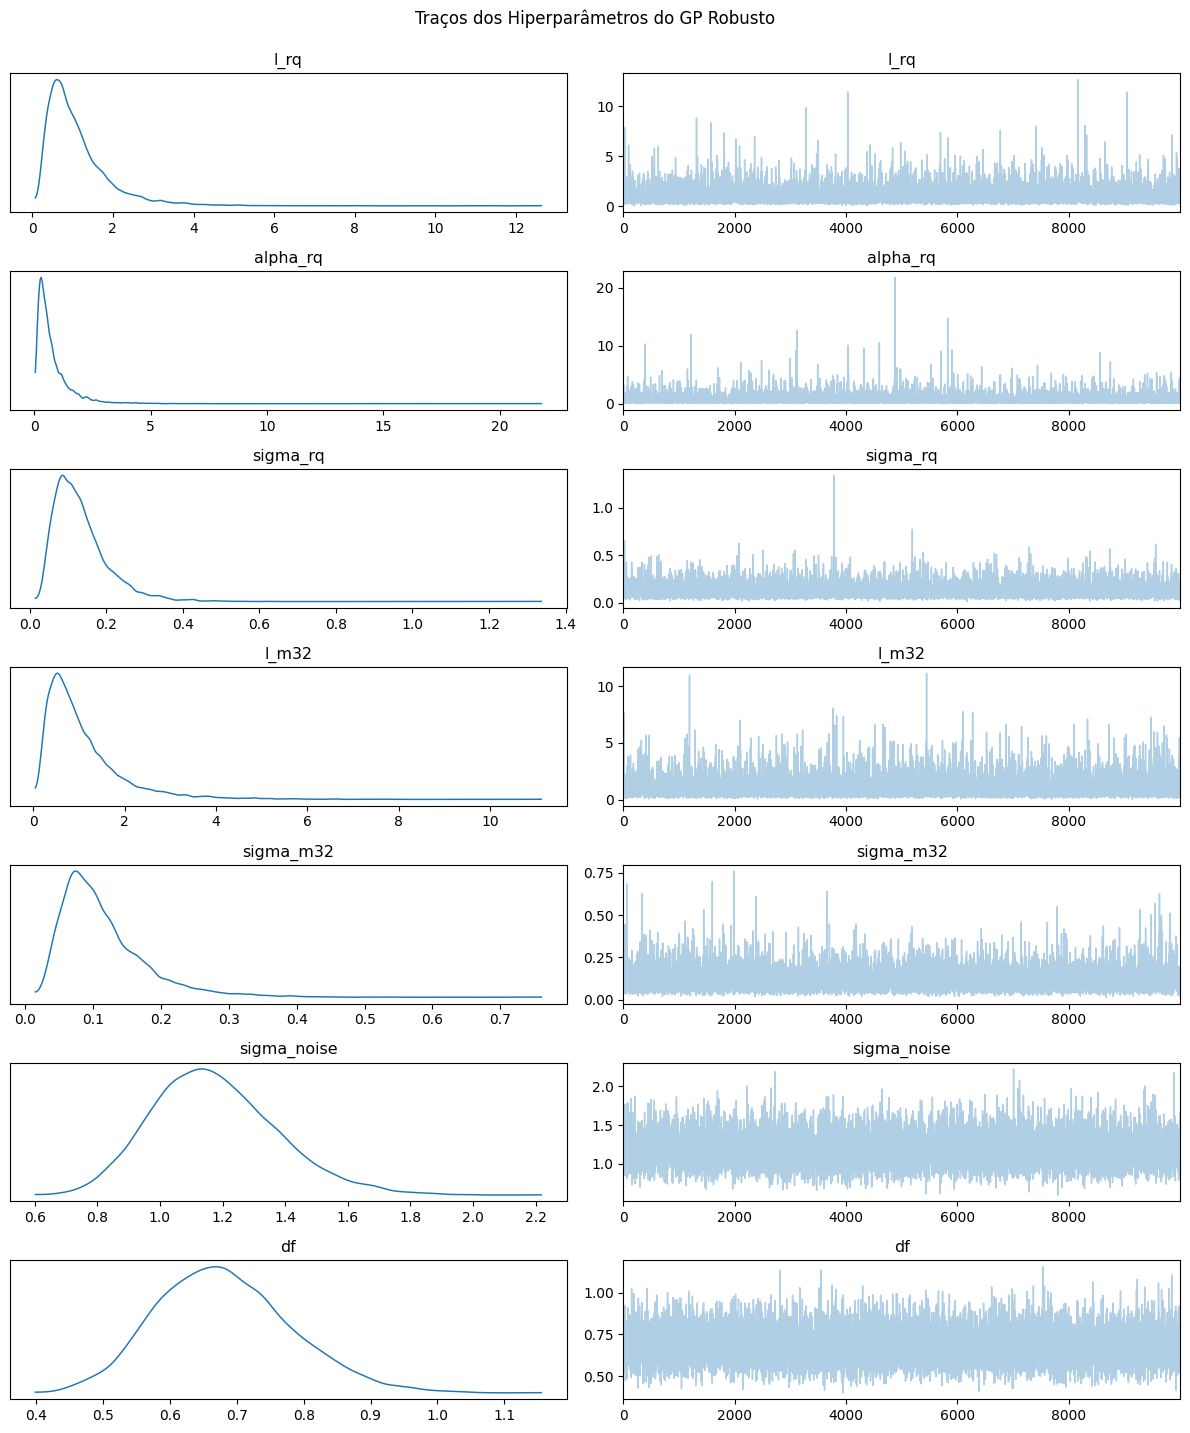

In [ ]:
plt.figure(figsize=(12, 8))
az.plot_trace(
    trace_gp_robust,
    var_names=[
        'l_rq',
        'alpha_rq',
        'sigma_rq',
        'l_m32',
        'sigma_m32',
        'sigma_noise',
        'df'
    ]
)
plt.tight_layout()
plt.suptitle('Traços dos Hiperparâmetros do GP Robusto', y=1.02)
plt.show()

#Análise a Posteriori

In [ ]:
with model_gp_latent_robust:
  trace_post_model_gp_robust = pm.sample_posterior_predictive(trace_gp_robust)

Output()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


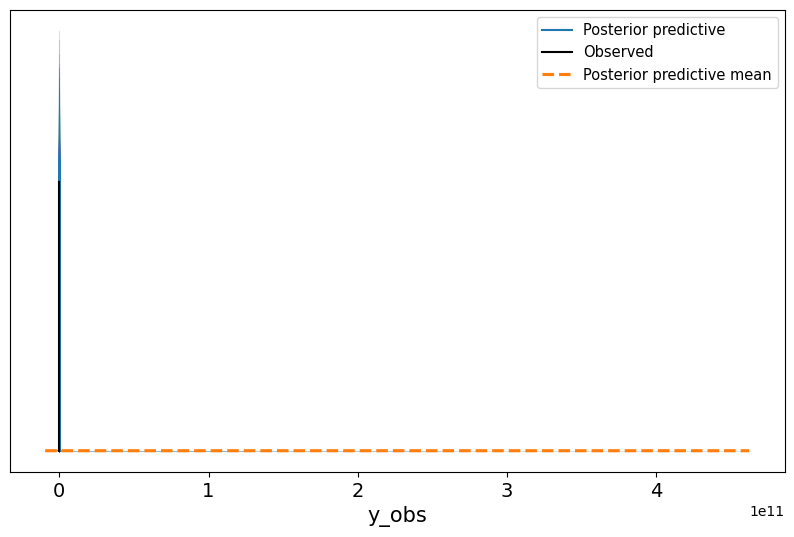

In [ ]:
az.plot_ppc(trace_post_model_gp_robust, mean=True, figsize=(10, 6), textsize=14)

plt.show()

In [ ]:
with pm.Model() as model_gp_latent_robust_2:
    l_rq      = pm.HalfNormal('l_rq', sigma=1)
    alpha_rq  = pm.HalfNormal('alpha_rq', sigma=1)
    sigma_rq  = pm.HalfNormal('sigma_rq', sigma=1)
    cov_rq   = sigma_rq   * pm.gp.cov.RatQuad(input_dim=p, ls=l_rq, alpha=alpha_rq)

    l_m32     = pm.HalfNormal('l_m32', sigma=1)
    sigma_m32 = pm.HalfNormal('sigma_m32', sigma=1)
    cov_m32  = sigma_m32  * pm.gp.cov.Matern32(input_dim=p, ls=l_m32)

    # Periodicidade em month
    l_cos_month   = pm.HalfNormal('l_cos_month', sigma=1)
    sigma_cos_month = pm.HalfNormal('sigma_cos_month', sigma=1)
    cov_cos_month   = sigma_cos_month**2 * pm.gp.cov.Cosine(
                          input_dim=p,
                          ls=l_cos_month,
                          active_dims=[2]
                      )

    # Periodicidade em day
    l_cos_day    = pm.HalfNormal('l_cos_day', sigma=1)
    sigma_cos_day = pm.HalfNormal('sigma_cos_day', sigma=1)
    cov_cos_day   = sigma_cos_day**2 * pm.gp.cov.Cosine(
                          input_dim=p,
                          ls=l_cos_day,
                          active_dims=[3]
                      )

    cov_total = cov_rq + cov_m32 + cov_cos_month + cov_cos_day

    a    = pm.Normal('a',    mu=0, sigma=1)
    beta = pm.Normal('beta', mu=0, sigma=1, shape=p)
    M = pm.gp.mean.Linear(coeffs=beta, intercept=a)


    gp_latent = pm.gp.Latent(mean_func=M, cov_func=cov_total)

    f = gp_latent.prior('f', X=x_train_gp)

    sigma_noise = pm.HalfNormal('sigma_noise', sigma=1)
    df = pm.Exponential('df', lam=1)

    y_obs = pm.StudentT('y_obs', nu=df, mu=f,
                   sigma=sigma_noise,
                   observed=y_train)

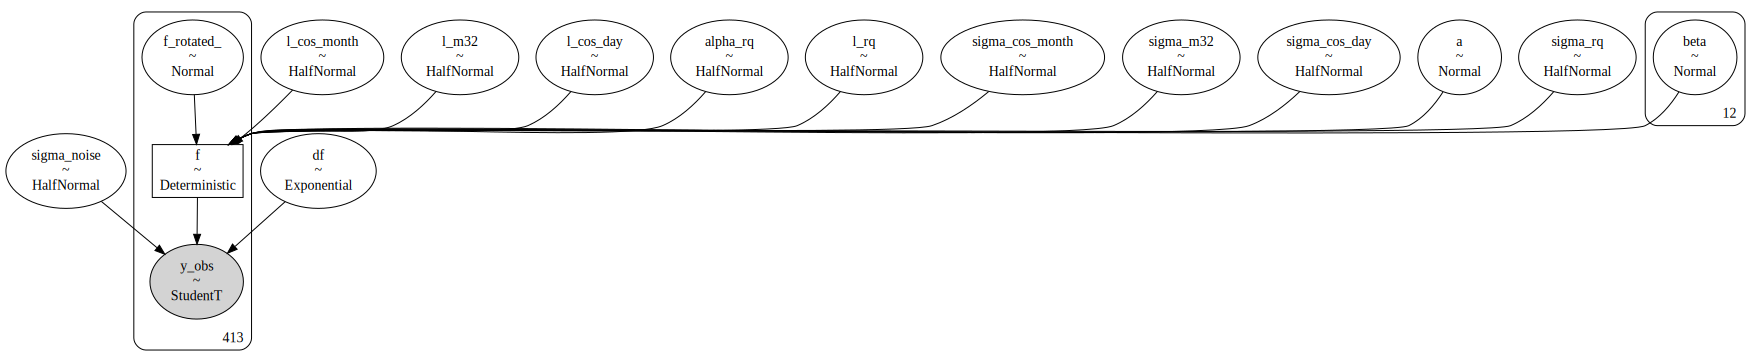

In [ ]:
pm.model_to_graphviz(model_gp_latent_robust_2)

#Análise a Priori

In [ ]:
with model_gp_latent_robust_2:
  trace_priori_model_gp_robust_2 = pm.sample_prior_predictive()

/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:188: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.11/dist-packages/arviz/stats/density_utils.py:250: RuntimeWarning: divide by zero encountered in scalar power
  out = t - (2 * N * np.pi**0.5 * f) ** (-0.4)


array([<Axes: xlabel='y_obs'>], dtype=object)

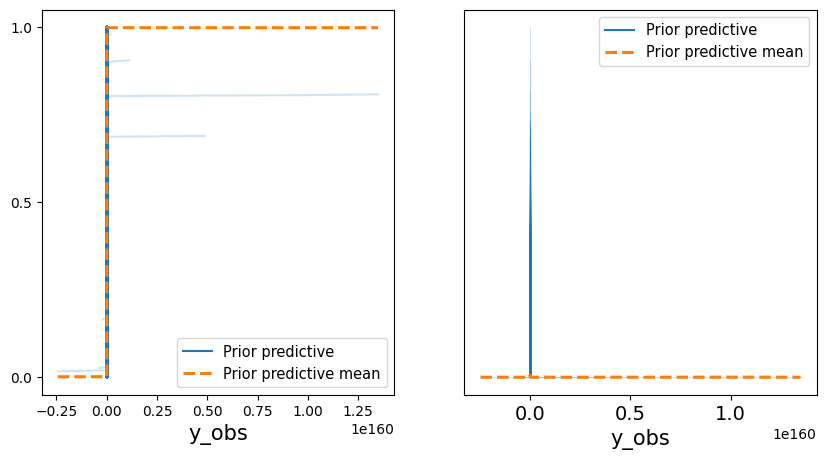

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
az.plot_ppc(trace_priori_model_gp_robust_2, group='prior', kind='cumulative',ax=axes[0])
az.plot_ppc(trace_priori_model_gp_robust_2, group='prior',ax=axes[1])

In [ ]:
with model_gp_latent_robust_2:
  approx_gp_robust_2 = pm.fit(10000)

Output()

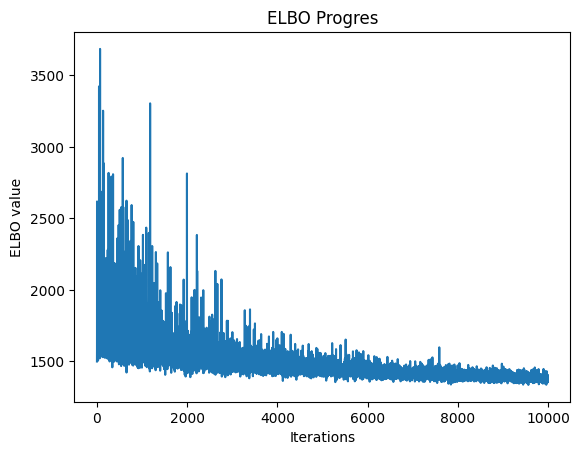

In [ ]:
plt.plot(approx_gp_robust_2.hist)
plt.title('ELBO Progres')
plt.xlabel('Iterations')
plt.ylabel('ELBO value')
plt.show()

In [ ]:
with model_gp_latent_robust_2:
  trace_gp_robust_2 = approx_gp_robust_2.sample(10000)
pm.summary(trace_gp_robust_2)

Shape validation failed: input_shape: (1, 10000), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a,0.457,0.208,0.070,0.851,0.002,0.001,10167.0,9938.0,NaN
alpha_rq,0.679,0.816,0.019,1.872,0.008,0.025,8974.0,9531.0,NaN
beta[0],0.031,0.265,-0.468,0.525,0.003,0.002,9951.0,9694.0,NaN
beta[1],0.068,0.159,-0.240,0.356,0.002,0.001,9884.0,10132.0,NaN
beta[2],0.094,0.331,-0.534,0.705,0.003,0.002,10361.0,9842.0,NaN
...,...,...,...,...,...,...,...,...,...
sigma_cos_day,0.260,0.164,0.056,0.559,0.002,0.003,9702.0,9792.0,NaN
sigma_cos_month,0.285,0.175,0.050,0.587,0.002,0.003,9839.0,9697.0,NaN
sigma_m32,0.120,0.067,0.026,0.237,0.001,0.001,9640.0,9717.0,NaN
sigma_noise,1.281,0.230,0.847,1.700,0.002,0.002,9564.0,9736.0,NaN


<Figure size 1200x800 with 0 Axes>

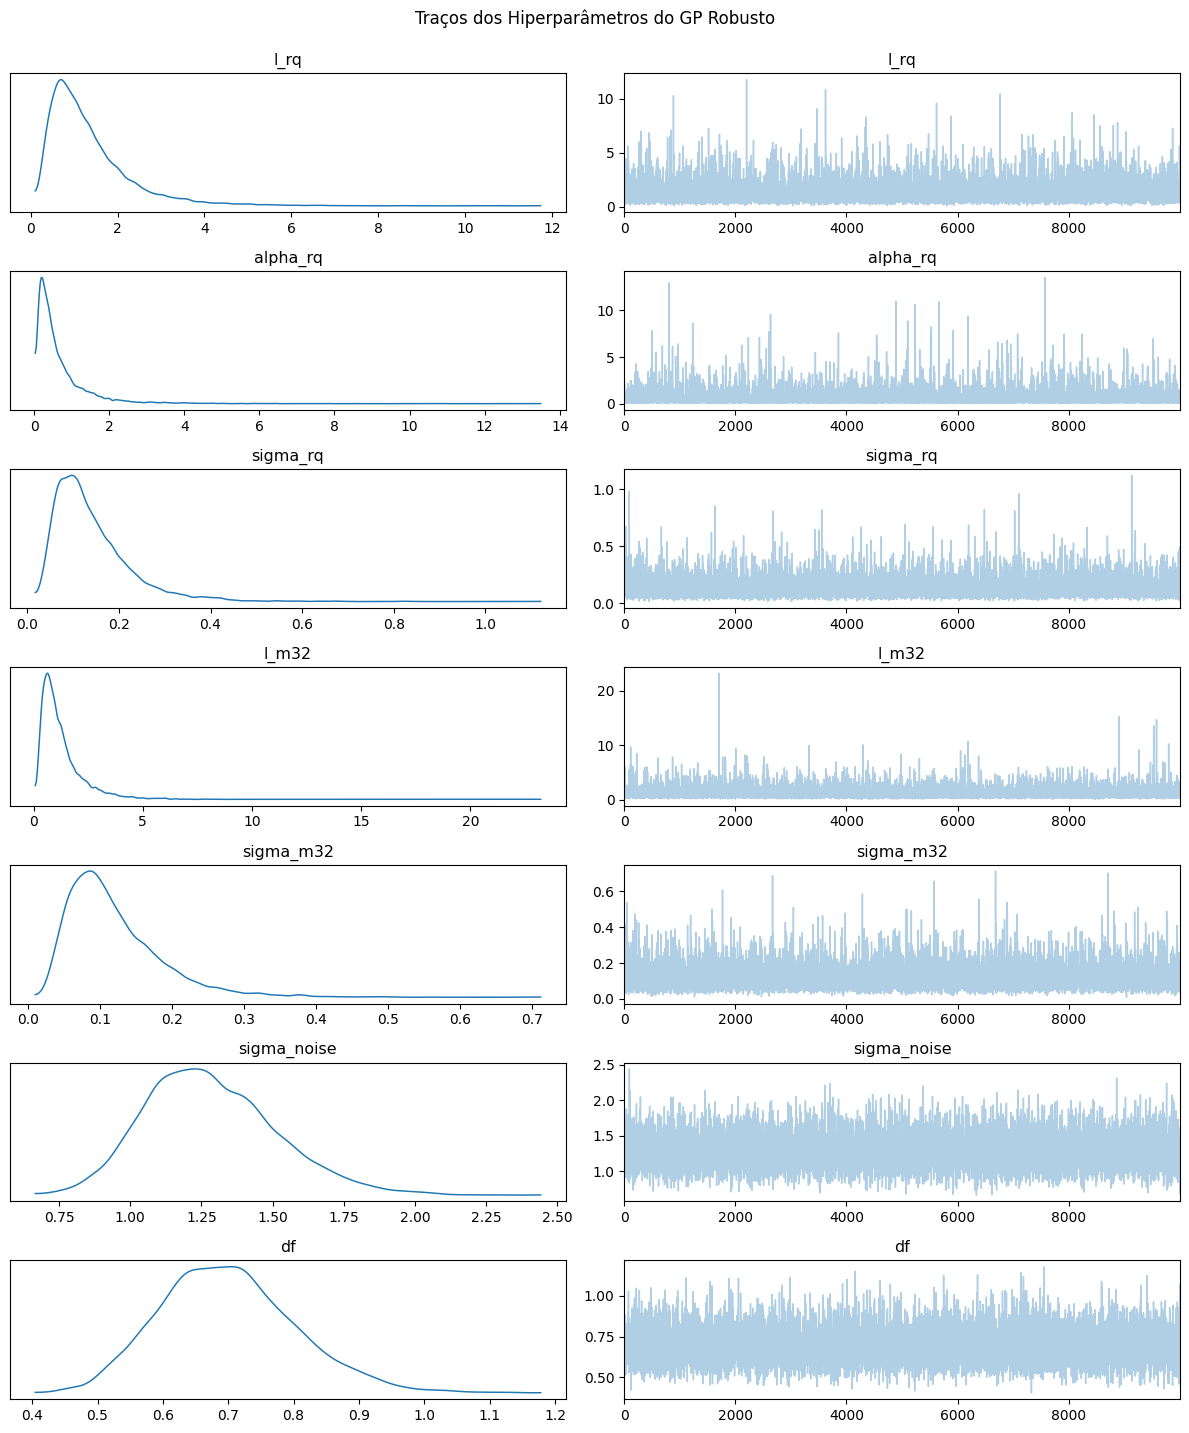

In [ ]:
plt.figure(figsize=(12, 8))
az.plot_trace(
    trace_gp_robust_2,
    var_names=[
        'l_rq',
        'alpha_rq',
        'sigma_rq',
        'l_m32',
        'sigma_m32',
        'sigma_noise',
        'df'
    ]
)
plt.tight_layout()
plt.suptitle('Traços dos Hiperparâmetros do GP Robusto', y=1.02)
plt.show()

#Análise a Posteriori

In [ ]:
with model_gp_latent_robust_2:
  trace_post_model_gp_robust_2 = pm.sample_posterior_predictive(trace_gp_robust_2)

Output()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


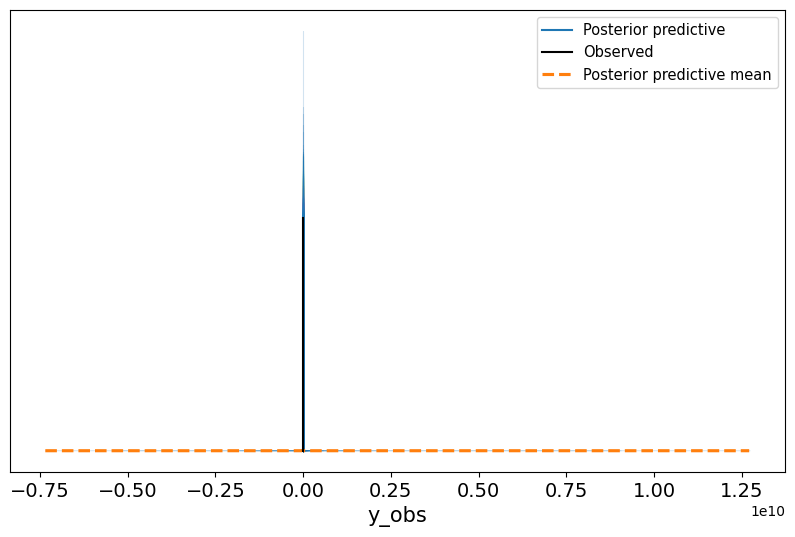

In [ ]:
az.plot_ppc(trace_post_model_gp_robust_2, mean=True, figsize=(10, 6), textsize=14)

plt.show()

#Regressão Linear Robusta

In [ ]:
with pm.Model() as model_linear_robust:
    # Priors
    beta0_robust = pm.Normal('beta0', mu=0, sigma=10)
    beta_robust = pm.Normal('beta', mu=0, sigma=10, shape=p)
    sigma_robust = pm.HalfNormal('sigma', sigma=1) # Desvio padrão do ruído

    # Graus de liberdade para a distribuição t de Student
    # Um prior exponencial favorece valores menores, aumentando a robustez
    nu_robust = pm.Exponential('nu', lam=1/10)
    # Ou pm.Gamma('nu', alpha=2, beta=0.1) se preferir um prior diferente para nu

    # Preditor linear
    mu_robust = beta0_robust + pm.math.dot(X_train, beta_robust)

    # Verossimilhança com distribuição t de Student para robustez
    y_obs_robust = pm.StudentT('y_obs', nu=nu_robust, mu=mu_robust,
                                sigma=sigma_robust, observed=y_train)

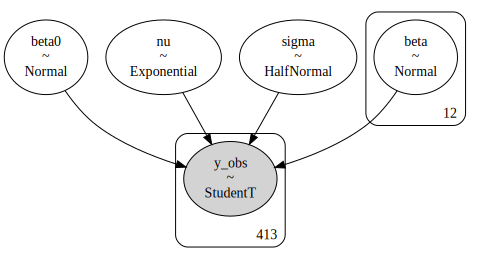

In [ ]:
pm.model_to_graphviz(model_linear_robust)

#Análise a Priori

In [ ]:
with model_linear_robust:
    trace_priori_linear_robust = pm.sample_prior_predictive()

/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:188: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


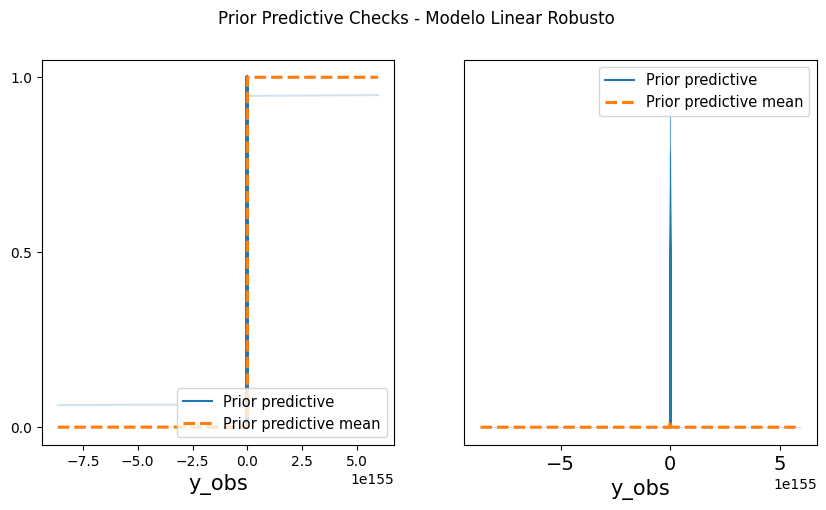

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
az.plot_ppc(trace_priori_linear_robust, group='prior', kind='cumulative', ax=axes[0])
az.plot_ppc(trace_priori_linear_robust, group='prior', ax=axes[1])
plt.suptitle('Prior Predictive Checks - Modelo Linear Robusto')
plt.show()

In [ ]:
with model_linear_robust:
    trace_linear_robust = pm.sample(draws=2000, tune=2000, cores=2) # Ajuste draws, tune e cores conforme sua máquina

pm.summary(trace_linear_robust, var_names=['beta0', 'beta', 'sigma', 'nu'])

Output()

ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta0,-0.000,0.000,-0.000,0.000,0.000,0.0,3547.0,120.0,1.05
beta[0],0.000,0.000,-0.000,0.000,0.000,0.0,3776.0,198.0,1.05
beta[1],-0.000,0.000,-0.000,0.000,0.000,0.0,4428.0,181.0,1.05
beta[2],0.000,0.000,-0.000,0.000,0.000,0.0,3441.0,130.0,1.06
beta[3],-0.000,0.000,-0.000,0.000,0.000,0.0,4492.0,1800.0,1.04
beta[4],-0.000,0.000,-0.000,0.000,0.000,0.0,4364.0,1761.0,1.04
beta[5],-0.000,0.000,-0.000,0.000,0.000,0.0,3661.0,209.0,1.06
beta[6],-0.000,0.000,-0.000,0.000,0.000,0.0,3235.0,116.0,1.06
beta[7],0.000,0.000,-0.000,0.000,0.000,0.0,4535.0,189.0,1.05
beta[8],0.000,0.000,-0.000,0.000,0.000,0.0,3925.0,222.0,1.06


<Figure size 1200x800 with 0 Axes>

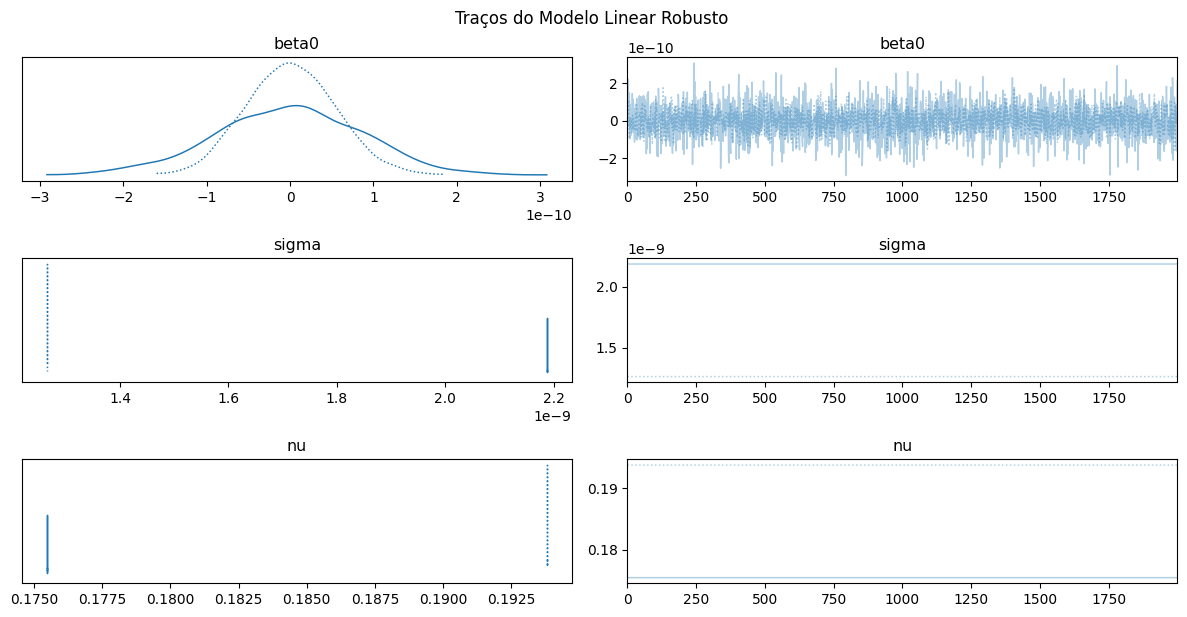

In [ ]:
plt.figure(figsize=(12, 8))
az.plot_trace(trace_linear_robust, var_names=['beta0', 'sigma', 'nu'])
# Para beta, você pode plotar um subconjunto ou o desvio padrão dos betas
# az.plot_trace(trace_linear_robust, var_names=['beta'])
plt.tight_layout()
plt.suptitle('Traços do Modelo Linear Robusto', y=1.02)
plt.show()

#Análise a Posteriori

In [ ]:
with model_linear_robust:
    trace_post_linear_robust = pm.sample_posterior_predictive(trace_linear_robust)

Output()

/usr/local/lib/python3.11/dist-packages/arviz/stats/density_utils.py:250: RuntimeWarning: divide by zero encountered in scalar power
  out = t - (2 * N * np.pi**0.5 * f) ** (-0.4)


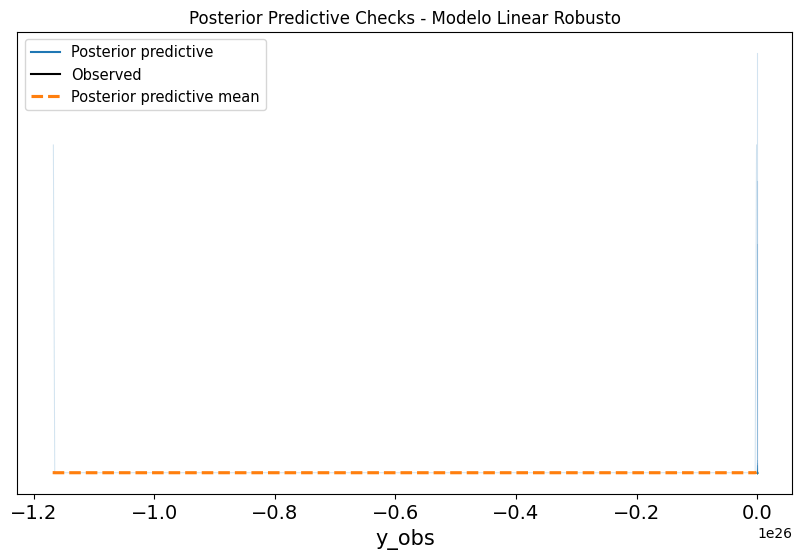

In [ ]:
az.plot_ppc(trace_post_linear_robust, mean=True, figsize=(10, 6), textsize=14)
plt.title('Posterior Predictive Checks - Modelo Linear Robusto')
plt.show()

In [ ]:
az.to_netcdf(trace_linear_robust, 'trace_linear_robust.nc')

'trace_linear_robust.nc'

# Comparação dos Modelos

In [ ]:
with model_quantile:
    pm.compute_log_likelihood(trace_quantile)

with model_skewnormal:
    pm.compute_log_likelihood(trace_skewnormal)

with model_gp_latent:
    pm.compute_log_likelihood(trace_gp)

with model_gp_latent_robust:
    pm.compute_log_likelihood(trace_gp_robust)

with model_gp_latent_robust_2:
    pm.compute_log_likelihood(trace_gp_robust_2)

Output()

Output()

/usr/local/lib/python3.11/dist-packages/pymc/model/fgraph.py:163: UserWarning: Detected variables likely created by GP objects. Further use of these old GP objects should be avoided as it may reintroduce variables from the old model. See issue: https://github.com/pymc-devs/pymc/issues/6883
  warnings.warn(


Output()

/usr/local/lib/python3.11/dist-packages/pymc/model/fgraph.py:163: UserWarning: Detected variables likely created by GP objects. Further use of these old GP objects should be avoided as it may reintroduce variables from the old model. See issue: https://github.com/pymc-devs/pymc/issues/6883
  warnings.warn(


Output()

/usr/local/lib/python3.11/dist-packages/pymc/model/fgraph.py:163: UserWarning: Detected variables likely created by GP objects. Further use of these old GP objects should be avoided as it may reintroduce variables from the old model. See issue: https://github.com/pymc-devs/pymc/issues/6883
  warnings.warn(


Output()

/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:797: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:797: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:1045: RuntimeWarning: ove

<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

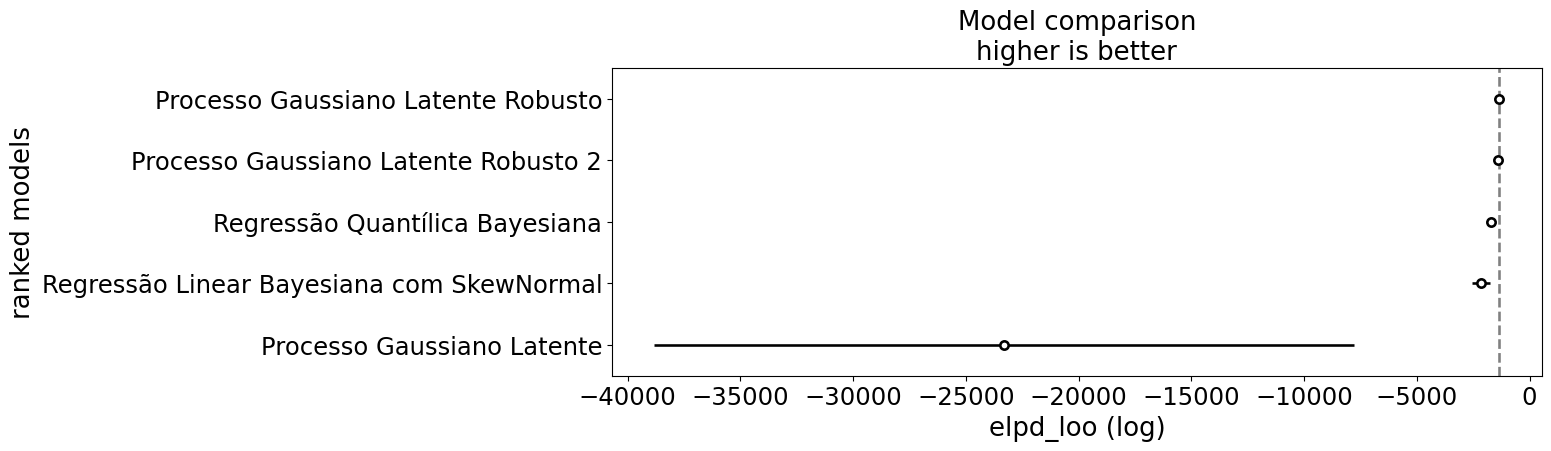

In [ ]:
model_compare = az.compare(
    {
        "Regressão Quantílica Bayesiana": trace_quantile,
        "Regressão Linear Bayesiana com SkewNormal": trace_skewnormal,
        "Processo Gaussiano Latente": trace_gp,
        "Processo Gaussiano Latente Robusto": trace_gp_robust,
        "Processo Gaussiano Latente Robusto 2": trace_gp_robust_2
    }, method='BB-pseudo-BMA'
)
az.plot_compare(model_compare, figsize=(12, 4), insample_dev=False)

In [ ]:
display(model_compare)

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
Processo Gaussiano Latente Robusto,0,-1372.826050,64.778763,0.000000,9.997348e-01,43.843168,0.000000,False,log
Processo Gaussiano Latente Robusto 2,1,-1381.675312,65.215203,8.849262,2.652160e-04,43.148248,1.152234,False,log
Regressão Quantílica Bayesiana,2,-1722.860893,19.006740,350.034844,3.217873e-90,87.854851,70.810618,True,log
Regressão Linear Bayesiana com SkewNormal,3,-2148.346392,74.435222,775.520342,3.110888e-117,394.828350,387.599763,True,log
Processo Gaussiano Latente,4,-23292.738846,21206.390121,21919.912796,0.000000e+00,15525.597104,15692.653657,True,log


#Teste do Modelo Vencedor

In [ ]:
with model_gp_latent_robust:
    x_test_c = gp_latent.conditional('X_test', X_test.values)
    pred_m_3 = pm.sample_posterior_predictive(trace_gp_robust, var_names=["X_test"])

Output()

In [ ]:
y_pred = pred_m_3.posterior_predictive["X_test"].values.mean(axis=1)[0]

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE:  {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² (Coeficiente de Determinação): {r2:.4f}")

MAE:  19.6802
RMSE: 110.3404
R² (Coeficiente de Determinação): -0.0329


#Conclusão

O Processo Gaussiano Latente Robusto foi o que apresentou melhor desempenho dentre os modelos treinados, mesmo assim os resultados MAE e RMSE não foram satisfatórios e o R² teve um resultado negativo, o que indica que uma linha reta horizontal seria mais eficaz para prever as áreas de incêndio do que os modelos usados neste notebook.
Observação: A regressão linear robusta não foi usado pois estava dando um valor de R_hat muito alto, porém quando ela era comparada com os outros modelos se saia como modelo vencedor, mas quando testada gerava erro. Para uma próxima análise seria interessante verificar o Processo Gaussiano Latente Robusto utilizando o sample e a Regressão com uma T-Student.